In [27]:
import json
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# dict of subjects (keys) and the list of publications they appear in (values).
types = json.load(open('../../../data/json/dim/all/relevant_types.json'))
type_clusters = json.load(open('../../oai_dc/types/clustered_types.json'))
depositonce = json.load(open('../../../data/json/dim/depositonce/relevant_subjects.json'))
edoc = json.load(open('../../../data/json/dim/edoc/relevant_subjects.json'))
refubium = json.load(open('../../../data/json/dim/refubium/relevant_subjects.json'))
subjects = dict(depositonce, **edoc, **refubium)
counts = {k: len(v) for k, v in subjects.items()}

In [3]:
def group_counts(counts):
    subject_sizes = dict()
    for subject, cnt in counts.items():
        if cnt not in subject_sizes:
            subject_sizes[cnt] = 0
        subject_sizes[cnt] += 1
    return sorted(subject_sizes.items())

In total, there are 29399 english documents in the repositories that are either theses or publications.
On average, a document has 3.37 subjects.
11091 of them have no subjects.


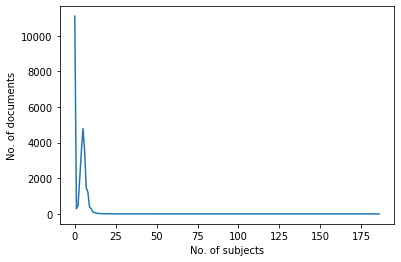

In [7]:
sorted_sizes = group_counts(counts)
print(f'In total, there are {len(counts)} english documents in the repositories that are either theses or publications.')
print(f'On average, a document has {round(sum(counts.values()) / len(counts), 2)} subjects.')
print(f'{sorted_sizes[0][1]} of them have no subjects.')
plt.plot([x[0] for x in sorted_sizes], [x[1] for x in sorted_sizes])
plt.xlabel('No. of subjects')
plt.ylabel('No. of documents')
plt.show()

An improved version of this plot can be found in 'relevant_subjects.ipynb'

In [9]:
def no_subjects(counts):
    zero = []
    for subject, cnt in counts.items():
        if cnt == 0:
            zero.append(subject)
    return zero

In [17]:
def get_type(id):
    for cluster in type_clusters:
        for t in type_clusters[cluster]:
            if t.lower().replace(' ', '').replace('doc-type:', '') == types[id]:
                return cluster

In [25]:
zero = no_subjects(counts)
hu_zero = [doc for doc in zero if 'hu-berlin' in doc]
tu_zero = [doc for doc in zero if 'depositonce' in doc]
fu_zero = [doc for doc in zero if 'refubium' in doc]
hu_zero_theses = [doc for doc in hu_zero if get_type(doc) == 'thesis']
hu_zero_publications = [doc for doc in hu_zero if get_type(doc) == 'publication']
tu_zero_theses = [doc for doc in tu_zero if get_type(doc) == 'thesis']
tu_zero_publications = [doc for doc in tu_zero if get_type(doc) == 'publication']
fu_zero_theses = [doc for doc in fu_zero if get_type(doc) == 'thesis']
fu_zero_publications = [doc for doc in fu_zero if get_type(doc) == 'publication']

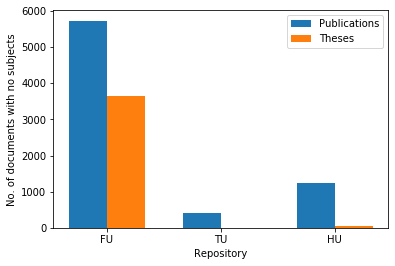

In [39]:
x = np.array([1, 2.5, 4])
plt.bar(x-.25, [len(fu_zero_publications), len(tu_zero_publications), len(hu_zero_publications)], width=.5, align='center', label='Publications')
plt.bar(x+.25, [len(fu_zero_theses), len(tu_zero_theses), len(hu_zero_theses)], width=.5, align='center', label='Theses')
plt.legend()
plt.xticks(x, ['FU', 'TU', 'HU'])
plt.xlabel('Repository')
plt.ylabel('No. of documents with no subjects')
plt.show()

In [33]:
len(hu_zero_theses), len(hu_zero_publications), len(tu_zero_theses), len(tu_zero_publications), len(fu_zero_theses), len(fu_zero_publications) 

(54, 1236, 0, 409, 3659, 5733)

In [51]:
hu_theses = [doc for doc in edoc if get_type(doc) == 'thesis']
hu_publications = [doc for doc in edoc if get_type(doc) == 'publication']
tu_theses = [doc for doc in depositonce if get_type(doc) == 'thesis']
tu_publications = [doc for doc in depositonce if get_type(doc) == 'publication']
fu_theses = [doc for doc in refubium if get_type(doc) == 'thesis']
fu_publications = [doc for doc in refubium if get_type(doc) == 'publication']

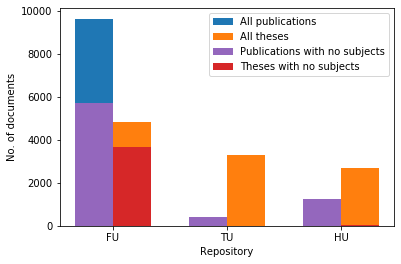

In [57]:
x = np.array([1, 2.5, 4])
plt.bar(x-.25, [len(fu_publications), len(tu_zero_publications), len(hu_zero_publications)], color='C0', width=.5, align='center', label='All publications')
plt.bar(x+.25, [len(fu_theses), len(tu_theses), len(hu_theses)], color='C1', width=.5, align='center', label='All theses')
plt.bar(x-.25, [len(fu_zero_publications), len(tu_zero_publications), len(hu_zero_publications)], color='C4', width=.5, align='center', label='Publications with no subjects')
plt.bar(x+.25, [len(fu_zero_theses), len(tu_zero_theses), len(hu_zero_theses)], color='C3', width=.5, align='center', label='Theses with no subjects')
plt.legend()
plt.xticks(x, ['FU', 'TU', 'HU'])
plt.xlabel('Repository')
plt.ylabel('No. of documents')
plt.show()

In [56]:
len(tu_publications), len(tu_zero_publications)

(4154, 409)